## Load Neccesary Libraries

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

## Collect the Data

In [228]:
suv_data = pd.read_csv('./archive/suv_data.csv')
suv_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [229]:
len(suv_data.index)

400

## Analyzing Data

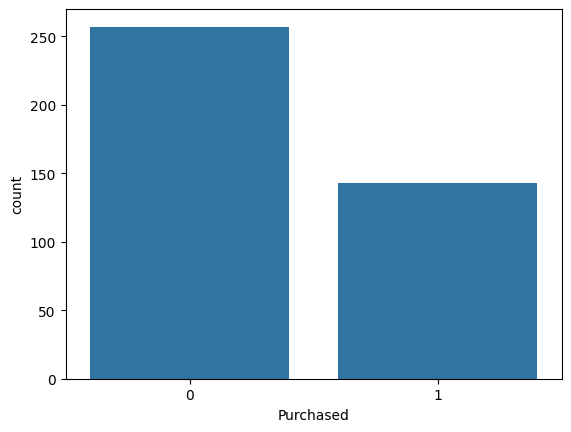

In [230]:
sns.countplot(x='Purchased', data=suv_data)
plt.show()

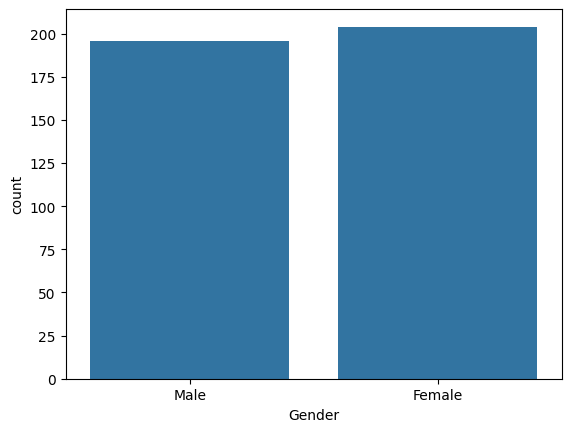

In [231]:
sns.countplot(x='Gender', data=suv_data)
plt.show()

<Axes: xlabel='Purchased', ylabel='count'>

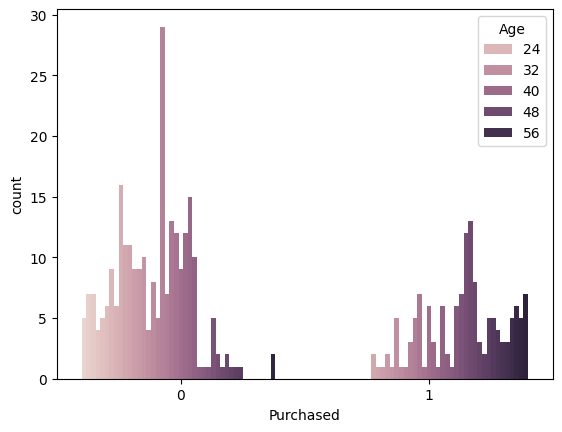

In [232]:
sns.countplot(x='Purchased', hue='Age', data=suv_data)

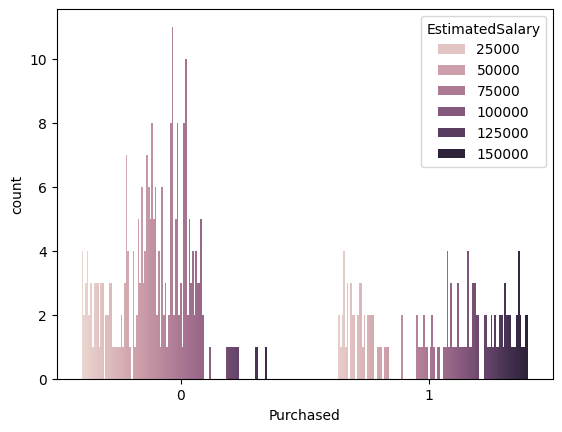

In [233]:
sns.countplot(x='Purchased', hue='EstimatedSalary', data=suv_data)
plt.show()

<Axes: ylabel='Frequency'>

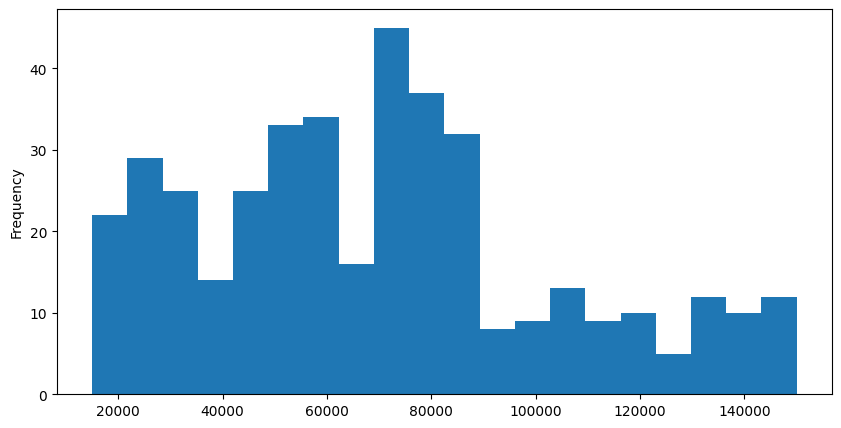

In [234]:
suv_data['EstimatedSalary'].plot.hist(bins=20, figsize=(10,5))

In [235]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Data Wrangling

In [236]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### We have to convert all our string values to categorical values in order to perform logistic regression

In [237]:
gender = pd.get_dummies(suv_data['Gender'], drop_first=True, dtype=int)
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [238]:
suv_data = pd.concat([suv_data, gender], axis=1)

In [239]:
suv_data

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [240]:
suv_data.drop(['Gender'], axis=1, inplace=True)

In [241]:
suv_data.head(10)

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
5,15728773,27,58000,0,1
6,15598044,27,84000,0,0
7,15694829,32,150000,1,0
8,15600575,25,33000,0,1
9,15727311,35,65000,0,0


In [242]:
suv_data.drop(['User ID'], axis=1, inplace=True)

In [243]:
suv_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


## Train and Test Data

In [244]:
# X = suv_data.iloc[:, [0,1]].values

# Adding the Gender makes it more accurate
X = suv_data.drop(['Purchased'], axis=1).values
y = suv_data.iloc[:,2].values

In [245]:
from sklearn.model_selection import train_test_split

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [247]:
# We can also scale our input values for better performing
from sklearn.preprocessing import StandardScaler

In [248]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [251]:
y_pred = classifier.predict(X_test)

## Accuracy Check

In [252]:
from sklearn.metrics import accuracy_score

In [253]:
accuracy_score(y_test, y_pred)*100

90.0